# Reproduce Results

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">


**IMPORTANT INFO:**

If there are random parts in the code, make sure to have **seeds to make your results reproducible**.

The `reproduce_results.ipynb` notebook:
- Is a responsability of all members of a group. All of you should execute this and ensure it works as expected.
- **Contain train/validation/test results of ROC AUC** (it is available in Scikit-learn: `sklearn.metrics.roc_auc_score`) as well as **precision** and **recall**.

Note that the teacher will only load and run this notebook, unless there is something very unclear requiring the execution of `train_models.ipynb` as well.

Additional notes:
- This notebook **does not have to train anything**.
- It should be relatively fast to execute (probably less than 10 minutes since there is no training).
- This notebook should only load previously trained models from disk. **After loading the models, it should make predictions and compute metrics**.
    
</div>

### Imports

In [1]:
import os
import pickle
import scipy
import pandas as pd
import sklearn
from utils import evaluate_model

## Load Data


A results NO hem de pujar la data original, sino el dataset (amb les features) q hem utilitzat per entrenar el model (+validation set + test set)

## Simple Solution

In [4]:
# load model
with open('model/simple_solution/simple_model.pkl', 'rb') as f:
    logistic = pickle.load(f)

C:\Users\Alejandro\anaconda3\envs\quora_challenge_env\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 0.23.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [31]:
# load data

with open('model/simple_solution/simple_model_X_tr.pkl','rb') as f:
    X_tr_q1q2 = pickle.load(f)  
    X_tr_q1q2 = scipy.sparse.csr_matrix(X_tr_q1q2) # converting to matrix
with open('model/simple_solution/simple_model_X_va.pkl','rb') as f:
    X_va_q1q2 = pickle.load(f)   
    X_va_q1q2 = scipy.sparse.csr_matrix(X_va_q1q2)
with open('model/simple_solution/simple_model_X_te.pkl','rb') as f:
    X_te_q1q2 = pickle.load(f)
    X_te_q1q2 = scipy.sparse.csr_matrix(X_te_q1q2)
with open('model/simple_solution/simple_model_y_tr.pkl','rb') as f:
    y_tr = pickle.load(f)
with open('model/simple_solution/simple_model_y_va.pkl','rb') as f:
    y_va = pickle.load(f)
with open('model/simple_solution/simple_model_y_te.pkl','rb') as f:
    y_te = pickle.load(f)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.8139789035173366
F1:  0.7313087927476779
Precision:  0.7820463974261281
Recall:  0.6867535943642599
ROC AUC:  0.7875053281482827

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.83      0.89      0.86    184298
    Positive       0.78      0.69      0.73    107599

    accuracy                           0.81    291897
   macro avg       0.81      0.79      0.79    291897
weighted avg       0.81      0.81      0.81    291897

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


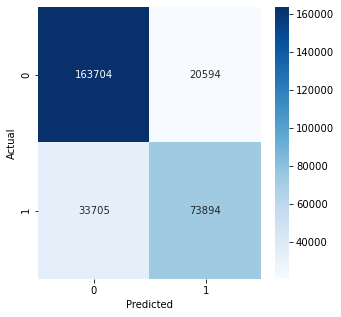

In [28]:
# Train results
train_metrics = evaluate_model(X_tr_q1q2, y_tr, model=logistic, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7489422638807525
F1:  0.6421081933747796
Precision:  0.6771037181996086
Recall:  0.6105523204517381
ROC AUC:  0.7201895265625028

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.78      0.83      0.81      9696
    Positive       0.68      0.61      0.64      5667

    accuracy                           0.75     15363
   macro avg       0.73      0.72      0.72     15363
weighted avg       0.75      0.75      0.75     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


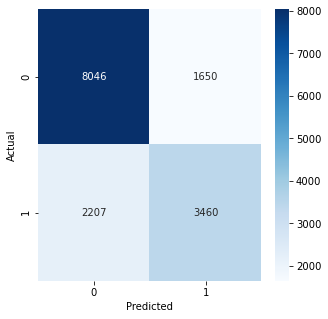

In [32]:
# Validation results
validation_metrics = evaluate_model(X_va_q1q2, y_va, model=logistic, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7576675735839723
F1:  0.654744075411858
Precision:  0.6953592814371258
Recall:  0.6186116197769269
ROC AUC:  0.7292271084620001

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.79      0.84      0.81     10165
    Positive       0.70      0.62      0.65      6007

    accuracy                           0.76     16172
   macro avg       0.74      0.73      0.73     16172
weighted avg       0.75      0.76      0.75     16172

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


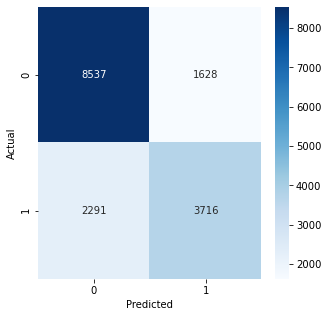

In [33]:
# Test results
test_metrics  = evaluate_model(X_te_q1q2, y_te, model=logistic, display=True)

## Improved Solution

### Text Cleaning and Basic Text Features

Results for the first approach, where we perform some data cleaning and add some basic text features.

In [3]:
# load model
with open('model/features_solution/features_model.pkl', 'rb') as f:
    logistic2 = pickle.load(f)
    
# load data

with open('model/features_solution/features_model_X_tr.pkl','rb') as f:
    X_tr_features_sparse = pickle.load(f)  
    X_tr_features_sparse = scipy.sparse.csr_matrix(X_tr_features_sparse) # converting to matrix
with open('model/features_solution/features_model_X_va.pkl','rb') as f:
    X_va_features_sparse = pickle.load(f)   
    X_va_features_sparse = scipy.sparse.csr_matrix(X_va_features_sparse)
with open('model/features_solution/features_model_X_te.pkl','rb') as f:
    X_te_features_sparse = pickle.load(f)
    X_te_features_sparse = scipy.sparse.csr_matrix(X_te_features_sparse)
with open('model/features_solution/features_model_y_tr.pkl','rb') as f:
    y_tr = pickle.load(f)
with open('model/features_solution/features_model_y_va.pkl','rb') as f:
    y_va = pickle.load(f)
with open('model/features_solution/features_model_y_te.pkl','rb') as f:
    y_te = pickle.load(f)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.8380627413094345
F1:  0.7761068192475475
Precision:  0.7913817085893127
Recall:  0.7614104220299445
ROC AUC:  0.8221126055607623

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.86      0.88      0.87    184298
    Positive       0.79      0.76      0.78    107599

    accuracy                           0.84    291897
   macro avg       0.83      0.82      0.82    291897
weighted avg       0.84      0.84      0.84    291897

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


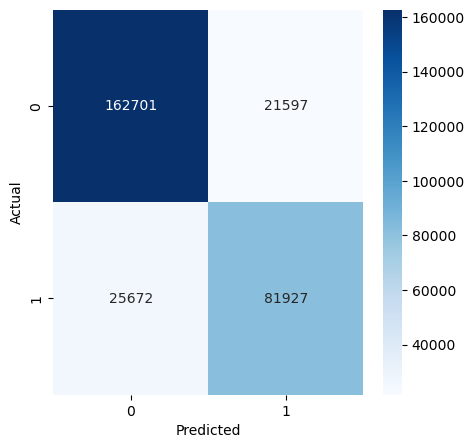

In [4]:
# train results
train_metrics2 = evaluate_model(X_tr_features_sparse, y_tr, model=logistic2, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.7801861615569876
F1:  0.6932509764737943
Precision:  0.7143391988019469
Recall:  0.6733721545791425
ROC AUC:  0.7579938330651488

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      9696
    Positive       0.71      0.67      0.69      5667

    accuracy                           0.78     15363
   macro avg       0.76      0.76      0.76     15363
weighted avg       0.78      0.78      0.78     15363

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


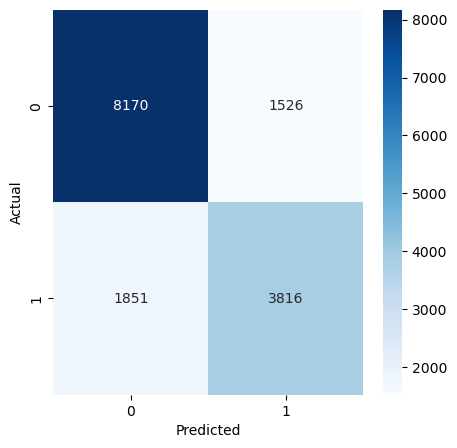

In [5]:
# validation results
validation_metrics2 = evaluate_model(X_va_features_sparse, y_va, model=logistic2, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.785864457086322
F1:  0.7038399042161978
Precision:  0.7237073513893775
Recall:  0.685034126852006
ROC AUC:  0.7652421003172968

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.83     10165
    Positive       0.72      0.69      0.70      6007

    accuracy                           0.79     16172
   macro avg       0.77      0.77      0.77     16172
weighted avg       0.78      0.79      0.78     16172

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


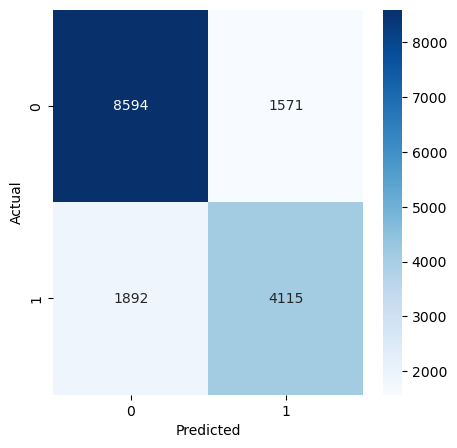

In [6]:
# test results
test_metrics2 = evaluate_model(X_te_features_sparse, y_te, model=logistic2, display=True)

### Only Word2Vect

In [9]:
# load model
folder = 'word2vect'
        
with open(f"model/{folder}_solution/{folder}_model.pkl",'rb') as f:
     logistic3 = pickle.load(f)
    
# load data
with open(f'model/{folder}_solution/{folder}_model_X_tr.pkl','rb') as f:
    X_tr_w2v = pickle.load(f)  
with open(f'model/{folder}_solution/{folder}_model_X_va.pkl','rb') as f:
    X_va_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_X_te.pkl','rb') as f:
    X_te_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_y_tr.pkl','rb') as f:
    y_tr_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_y_va.pkl','rb') as f:
    y_va_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_y_te.pkl','rb') as f:
    y_te_w2v = pickle.load(f) 

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6855345045513564
F1:  0.42602278156352935
Precision:  0.6534945614441101
Recall:  0.31602066701484743
ROC AUC:  0.608954749738605

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.69      0.90      0.78    183129
    Positive       0.65      0.32      0.43    107224

    accuracy                           0.69    290353
   macro avg       0.67      0.61      0.60    290353
weighted avg       0.68      0.69      0.65    290353

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


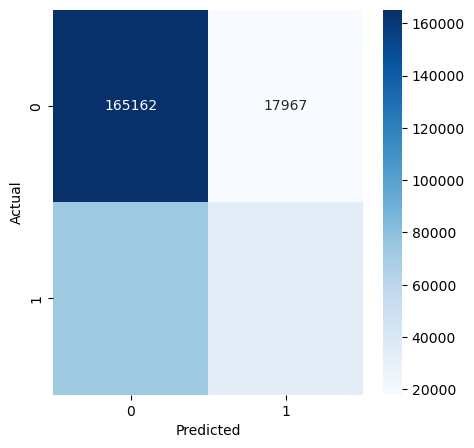

In [10]:
# train results
train_metrics3 = evaluate_model(X_tr_w2v, y_tr_w2v, model=logistic3, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6842793617577818
F1:  0.4261944378416924
Precision:  0.6486975397973951
Recall:  0.31734513274336285
ROC AUC:  0.6083199424347389

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.69      0.90      0.78      9642
    Positive       0.65      0.32      0.43      5650

    accuracy                           0.68     15292
   macro avg       0.67      0.61      0.60     15292
weighted avg       0.68      0.68      0.65     15292

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


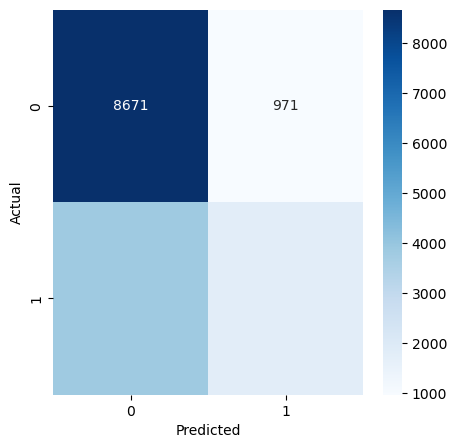

In [11]:
# validation results
validation_metrics3 = evaluate_model(X_va_w2v,y_va_w2v, model=logistic3, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6828070611636002
F1:  0.42475481907338514
Precision:  0.6523545706371191
Recall:  0.31489219455122847
ROC AUC:  0.6077677202345455

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.69      0.90      0.78     10105
    Positive       0.65      0.31      0.42      5983

    accuracy                           0.68     16088
   macro avg       0.67      0.61      0.60     16088
weighted avg       0.68      0.68      0.65     16088

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


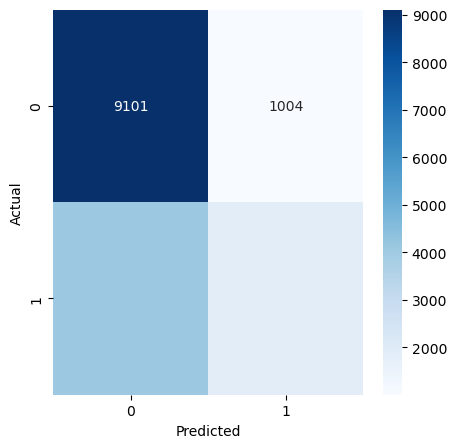

In [12]:
# test results
test_metrics3 = evaluate_model(X_te_w2v,y_te_w2v, model=logistic3, display=True)

### Only Word2Vect pre-trained

In [3]:
# load model
folder = 'word2vect_pre'
        
with open(f"model/{folder}_solution/{folder}_model.pkl",'rb') as f:
     logistic4 = pickle.load(f)
    
# load data
with open(f'model/{folder}_solution/{folder}_model_X_tr.pkl','rb') as f:
    X_tr_w2v = pickle.load(f)  
with open(f'model/{folder}_solution/{folder}_model_X_va.pkl','rb') as f:
    X_va_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_X_te.pkl','rb') as f:
    X_te_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_y_tr.pkl','rb') as f:
    y_tr_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_y_va.pkl','rb') as f:
    y_va_w2v = pickle.load(f) 
with open(f'model/{folder}_solution/{folder}_model_y_te.pkl','rb') as f:
    y_te_w2v = pickle.load(f) 

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6987655843688652
F1:  0.5000056866647711
Precision:  0.6441370822405532
Recall:  0.40858186414371883
ROC AUC:  0.6383912142511519

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.72      0.87      0.78    184280
    Positive       0.64      0.41      0.50    107599

    accuracy                           0.70    291879
   macro avg       0.68      0.64      0.64    291879
weighted avg       0.69      0.70      0.68    291879

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


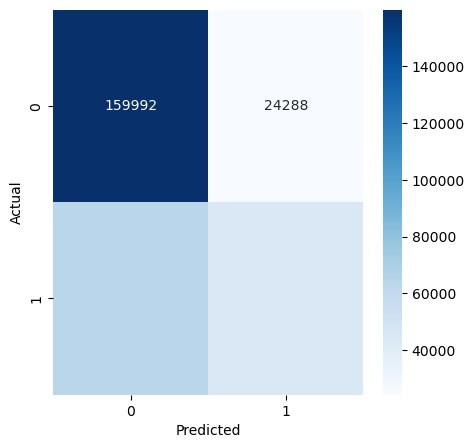

In [4]:
# train results
train_metrics4 = evaluate_model(X_tr_w2v, y_tr_w2v, model=logistic4, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6970900332009635
F1:  0.49951597289448213
Precision:  0.6396694214876033
Recall:  0.4097406034939121
ROC AUC:  0.6374058907710948

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.71      0.87      0.78      9694
    Positive       0.64      0.41      0.50      5667

    accuracy                           0.70     15361
   macro avg       0.68      0.64      0.64     15361
weighted avg       0.69      0.70      0.68     15361

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


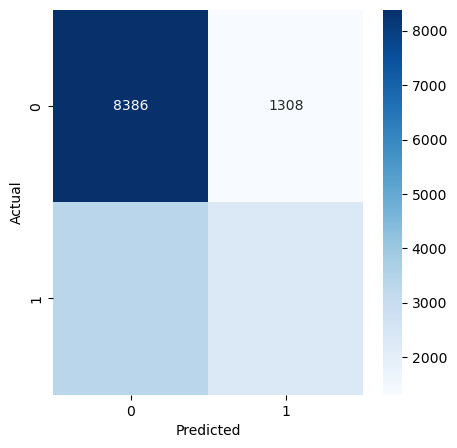

In [5]:
# validation results
validation_metrics4 = evaluate_model(X_va_w2v,y_va_w2v, model=logistic4, display=True)

METRICS: 
 ------------------------------------------------------------------------------------------
Accuracy:  0.6990909653082679
F1:  0.5029622063329929
Precision:  0.6508062384351044
Recall:  0.40985516896953555
ROC AUC:  0.6399433263186914

 CLASSIFICATION REPORT: 
 ------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    Negative       0.71      0.87      0.78     10164
    Positive       0.65      0.41      0.50      6007

    accuracy                           0.70     16171
   macro avg       0.68      0.64      0.64     16171
weighted avg       0.69      0.70      0.68     16171

CONFUSION MATRIX: 
 ------------------------------------------------------------------------------------------


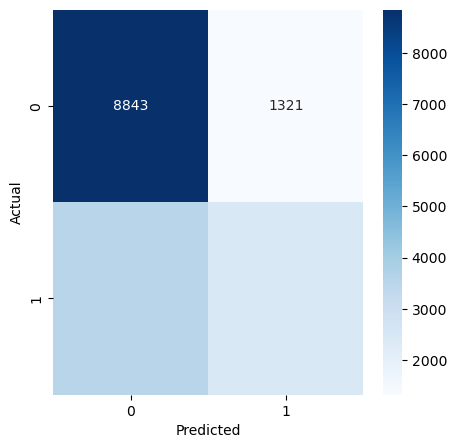

In [6]:
# test results
test_metrics4 = evaluate_model(X_te_w2v,y_te_w2v, model=logistic4, display=True)